This is a [jupyter](https://jupyter.org/) notebook that contains text, equations, images and executable code in one document.

$
\newcommand{\dd}{\text{d}}
\newcommand{\e}{\operatorname{e}}
\newcommand{\Fc}{\underline F}
\newcommand{\Hc}{\underline H}
\newcommand{\Xc}{\underline X}
\newcommand{\Yc}{\underline Y}
\newcommand{\Zc}{\underline Z}
\newcommand{\xic}{\underline \xi}
\newcommand{\vc}{\underline v}
\newcommand{\xiv}{\pmb{\xi}}
\newcommand{\Psiv}{\pmb{\Psi}}
\newcommand{\xivc}{\underline \xiv}
\newcommand{\xv}{\mathbf{x}}
\newcommand{\jj}{\operatorname{j}}
$

# 4 Plate Waves
## 4.1 Plates
(sketch with plate and reflected waves)
* plate with thickness $h$
* two boundaries with free surface at $y=\pm h$
* _free_ means no restrictions for excitation normal to surface $\xi_y$
* stresses normal to surface vanish (boundary conditions at $y=\pm h$):
\begin{gather}\label{eq:free_BC}
\sigma_y=0\\
\tau_{yx}=0\\
\tau_{yz}=0
\end{gather}
* reflection of both L- and T-waves occurs at both parallel surfaces
* wave fields have to be compatible at both surfaces at the same time
* only possible for certain wave numbers $k_x$
* wave **modes** propagate with apparent (phase) speed $c_x$
* **case 1**: modes have only in-plane motion (**T-waves** with $z$-displacement)
  * after derivation of wave fields compatible with boundary conditions:
\begin{equation}\label{eq:love}
c_x = \frac{c_T}{\sqrt{1-\left(\frac{mc_T}{2fh}\right)^2}}
\end{equation}
with the mode order $m=0,1,2,\dots$
  * for $m>0$, phase speed depends on frequency (= dispersion)
  * let us plot the phase speed over frequency:

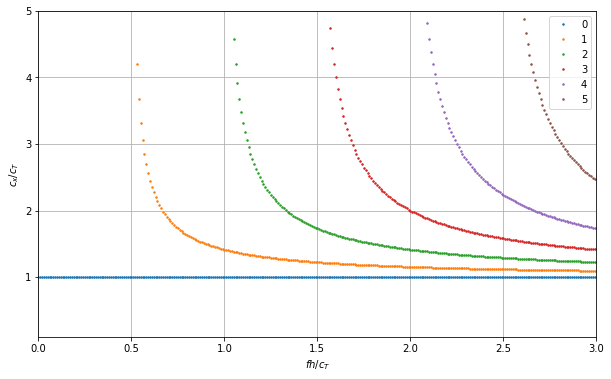

In [1]:
import numpy as np
import scipy.optimize as sop
import matplotlib.pyplot as pl
%matplotlib inline

f1 = np.arange(1e-10,3,0.01)
m = np.arange(6)
c = 1/np.sqrt(1+0j-0.5*m[:,np.newaxis]/f1[np.newaxis])
pl.figure(figsize=(10,6))
pl.plot(f1,c.T.real,'.',ms=3)
pl.xlim(0,3)
pl.ylim(1e-1,5)
pl.grid(True)
pl.legend(m)
pl.xlabel(r'$fh/c_T$')
pl.ylabel(r'$c_x/c_T$');

* **case 2**: modes having also out-of-plane motion (**Lamb waves**)
  * derivation for subcase of symmetric $y$-displacement
\begin{equation}\label{eq:lamb}
\frac{\tan\left(\frac{\pi f h\beta}{c}\right)}{\tan\left(\frac{\pi f h\alpha}{c}\right)}+\left(\frac{4\alpha\beta}{(\beta^2-1)^2}
\right)^{\pm1}=0
\end{equation}
with $\alpha=\sqrt{\frac{c^2}{n^2}-1}$, $\beta=\sqrt{c^2-1}$, $c=\frac{c_x}{c_T}$, $n^2=\frac{2-2\mu}{1-2\mu}$
  * exponent +1 is for modes with the $y$-displacement field **symmetric** to $y=0$
  * exponent -1 is for modes with the $y$-displacement field **antisymmetric** to $y=0$
  * equation is transcendental and can only be solved numerically

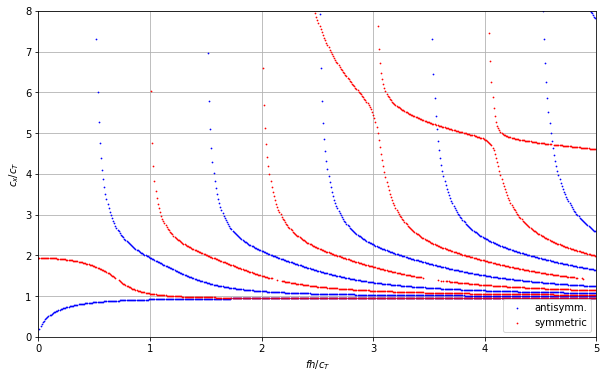

In [2]:
# lhs of characteristic equations
def teq(c,mu=0.34,f=0.4):
    n2 = (2-2*mu)/(1-2*mu) # 
    beta = np.sqrt(-1+0j+c*c)
    alpha = np.sqrt(-1+0j+c*c/n2)
    t1 = np.tan(np.pi*f*beta/c)
    t2 = np.tan(np.pi*f*alpha/c)
    t3 = (4*alpha)/(beta**2-1)**2
    return t1*beta+t2/t3, t1/beta+t2*t3 #antisymm., symm. mode


pl.figure(figsize=(10,6))
step = 1e-3 # stepsize to find roots
c = np.arange(1e-10,10,step) # test values to find roots
for f in np.arange(1e-10,5,0.01):
    eA,eS = teq(c,mu=0.47,f=f) # assume mu=.47 (see Cremer/Heckl)
    # now find all changes of sign from - to + only (these are roots) 
    # because changes of sign from + to - are poles
    cA = np.extract((eA[1:]>0) * (eA[:-1]<0),c[:-1])+step/2 #antisymm
    cS = np.extract((eS[1:]>0) * (eS[:-1]<0),c[:-1])+step/2 #symm
    pl.plot(f*np.ones_like(cA),cA,'b.',ms=1.5)
    pl.plot(f*np.ones_like(cS),cS,'r.',ms=1.5)
pl.ylim(0,8)
pl.xlim(0,5)
pl.grid(True)
pl.legend(('antisymm.','symmetric'))
pl.xlabel(r'$fh/c_T$')
pl.ylabel(r'$c_x/c_T$');

## 5.2 Thin Plates
![./plate_stresses.png](./plate_stresses.png)
* in many engineering structures, plates are thin 
* $\frac{fh}{c_T}$ is small and $h$ is small compared to the T-wave wave length
* only small _variations_ of $\xi_y$ over the thickness of the plate
* apparent two-dimensional wave propagation in the plane of the plate (no propagation in $z$-direction)
* normal stress-strain relations must respect boundary conditions $\sigma_y=0$
* only small changes across the thickness means $\sigma_y(y)\approx0$ (plane stress condition)
* substituting for $\frac{\partial \xi_y}{\partial y}$ in the normal stress-strain relations gives 
\begin{gather}\label{eq:normalstress}
\sigma_x =\frac{2 G}{1-\mu}\left( \frac{\partial \xi_x}{\partial x} + \mu\frac{\partial \xi_z}{\partial z}\right)\\
\sigma_z =\frac{2 G}{1-\mu}\left( \frac{\partial \xi_z}{\partial z} + \mu\frac{\partial \xi_x}{\partial x}\right)
\end{gather}
* shear stresses are
\begin{align}\label{eq:shear_stress}
\tau_{xy} = \tau_{yx} &=  G \gamma_{xy}
=G \left(\frac{\partial \xi_x}{\partial y}+\frac{\partial \xi_y}{\partial x}\right)\\ 
\tau_{zy} = \tau_{yz} &=  G \gamma_{zy}
=G \left(\frac{\partial \xi_z}{\partial y}+\frac{\partial \xi_y}{\partial z}\right)\\ 
\tau_{xz} = \tau_{zx} &=  G \gamma_{xz}
=G \left(\frac{\partial \xi_x}{\partial z}+\frac{\partial \xi_z}{\partial x}\right)
\end{align}
* general equations of motion
\begin{equation}
\begin{aligned}\label{eq:bewegungsgleichung_koerperschall}
\frac{\partial \sigma_x}{\partial x}+\frac{\partial \tau_{xy}}{\partial y}+\frac{\partial \tau_{xz}}{\partial z}&-\rho\frac{\partial^2 \xi_x}{\partial t^2}=0,\\
\frac{\partial \tau_{yx}}{\partial x}+\frac{\partial \sigma_y}{\partial y}+\frac{\partial \tau_{yz}}{\partial z}&-\rho\frac{\partial^2 \xi_y}{\partial t^2}=0,\\
\frac{\partial \tau_{zx}}{\partial x}+\frac{\partial \tau_{zy}}{\partial y}+\frac{\partial \sigma_z}{\partial z}&-\rho\frac{\partial^2 \xi_z}{\partial t^2}=0.\\
\end{aligned}
\end{equation}
* now substitute stresses (we use symbolic math):

In [3]:
import sympy as sy
# define necessary symbols
G,mu,rho, x,y,z,t = sy.symbols("G mu rho x y z t")
# displacments are functions of time and space
xix = sy.Function('xi_x')(x,y,z,t)
xiy = sy.Function('xi_y')(x,y,z,t)
xiz = sy.Function('xi_z')(x,y,z,t)
# normal stresses
sx = 2*G/(1-mu)*(sy.diff(xix,x)+mu*sy.diff(xiz,z))
sz = 2*G/(1-mu)*(sy.diff(xiz,z)+mu*sy.diff(xix,x))
# shear stresses
txy = G*(sy.diff(xix,y)+sy.diff(xiy,x))
tyz = G*(sy.diff(xiz,y)+sy.diff(xiy,z))
txz = G*(sy.diff(xix,z)+sy.diff(xiz,x))
# equations of motion lhss
emo1 = sy.Eq(sy.diff(sx,x)+sy.diff(txy,y)+sy.diff(txz,z)
             -rho*sy.diff(xix,t,2))
emo2 = sy.Eq(sy.diff(txy,x)+sy.diff(tyz,z)-rho*sy.diff(xiy,t,2))
emo3 = sy.Eq(sy.diff(txz,x)+sy.diff(tyz,y)+sy.diff(sz,z)
             -rho*sy.diff(xiz,t,2))
display(emo1,emo2,emo3)

Eq(G*(Derivative(xi_x(x, y, z, t), (y, 2)) + Derivative(xi_y(x, y, z, t), x, y)) + G*(Derivative(xi_x(x, y, z, t), (z, 2)) + Derivative(xi_z(x, y, z, t), x, z)) + 2*G*(mu*Derivative(xi_z(x, y, z, t), x, z) + Derivative(xi_x(x, y, z, t), (x, 2)))/(1 - mu) - rho*Derivative(xi_x(x, y, z, t), (t, 2)), 0)

Eq(G*(Derivative(xi_y(x, y, z, t), (x, 2)) + Derivative(xi_x(x, y, z, t), x, y)) + G*(Derivative(xi_y(x, y, z, t), (z, 2)) + Derivative(xi_z(x, y, z, t), y, z)) - rho*Derivative(xi_y(x, y, z, t), (t, 2)), 0)

Eq(G*(Derivative(xi_z(x, y, z, t), (x, 2)) + Derivative(xi_x(x, y, z, t), x, z)) + G*(Derivative(xi_z(x, y, z, t), (y, 2)) + Derivative(xi_y(x, y, z, t), y, z)) + 2*G*(mu*Derivative(xi_x(x, y, z, t), x, z) + Derivative(xi_z(x, y, z, t), (z, 2)))/(1 - mu) - rho*Derivative(xi_z(x, y, z, t), (t, 2)), 0)

* because of the small displacements we assume no $y$ dependency for $\xi_y$
\begin{equation}\label{eq:xiy0}
\xi_y = \xi_{y0}
\end{equation}
where the index 0 stands for the value in the "neutral" plane $y=0$
* and linear $y$ dependency for $\xi_x$ and $\xi_z$:
\begin{gather}\label{eq:xixz}
\xi_x = y \chi_z + \xi_{x0}\\
\xi_z = -y \chi_x + \xi_{z0}
\end{gather}
* rotation angles are assumed to have no $y$ dependency

In [4]:
# no y-dependency
xix0 = sy.Function('xi_x0')(x,z,t)
xiy0 = sy.Function('xi_y0')(x,z,t)
xiz0 = sy.Function('xi_z0')(x,z,t)
chiz = sy.Function('chi_z')(x,z,t)
chix = sy.Function('chi_x')(x,z,t)

### case 1: symmetric modes
* $\chi_x=\chi_z=0$ and $\xi_{y0}=0$

In [5]:
# substitute case1 conditions into eq. of motion
case1 = {xix:xix0, xiz:xiz0, xiy:0}
we1 = emo1.subs(case1).doit().expand()
we2 = emo3.subs(case1).doit().expand()
display(we1,we2)

Eq(2*G*mu*Derivative(xi_z0(x, z, t), x, z)/(1 - mu) + G*Derivative(xi_x0(x, z, t), (z, 2)) + G*Derivative(xi_z0(x, z, t), x, z) + 2*G*Derivative(xi_x0(x, z, t), (x, 2))/(1 - mu) - rho*Derivative(xi_x0(x, z, t), (t, 2)), 0)

Eq(2*G*mu*Derivative(xi_x0(x, z, t), x, z)/(1 - mu) + G*Derivative(xi_z0(x, z, t), (x, 2)) + G*Derivative(xi_x0(x, z, t), x, z) + 2*G*Derivative(xi_z0(x, z, t), (z, 2))/(1 - mu) - rho*Derivative(xi_z0(x, z, t), (t, 2)), 0)

* system of wave equations for in-plane wave motion 
* displacement in $x$ and $z$ directions are coupled!
* special case: plane wave $x$-direction only:

In [6]:
# substitute plane x-wave conditions into wave eq.
planex = {xix0:sy.Function('xi_x0')(x,t),
         xiz0:sy.Function('xi_z0')(x,t)}
we1x = we1.subs(planex).doit()
we2x = we2.subs(planex).doit()
display(we1x,we2x)

Eq(2*G*Derivative(xi_x0(x, t), (x, 2))/(1 - mu) - rho*Derivative(xi_x0(x, t), (t, 2)), 0)

Eq(G*Derivative(xi_z0(x, t), (x, 2)) - rho*Derivative(xi_z0(x, t), (t, 2)), 0)

* separated wave equations
* first is for wave with (predominantly) longitudinal motion (**quasilongitudinal waves**) 
* some small symmetric $y$-displacement due to unhindered transverse contraction
* speed of sound is a little bit different from $c_L$ (longitudinal waves)
  \begin{equation}\label{eq:cLI}
c_{LI}=\sqrt{\frac{2G}{\rho(1-\mu)}}=\sqrt{\frac{E}{\rho(1-\mu^2)}}
\end{equation}
* second is transversal wave with the same speed as before
  \begin{equation}\label{eq:cT}
c_{T}=\sqrt{\frac{G}{\rho}}
\end{equation}


### case 2: antisymmetric modes 
* $\xi_{x0}=\xi_{z0}=0$

In [7]:
# substitute case2 conditions into eq. of motion
case2 = {xix:y*chiz, xiz:-y*chix}#, xiy:xiy0}
emo1c2 = emo1.subs(case2).doit()
emo2c2 = emo2.subs(case2).doit()
emo3c2 = emo3.subs(case2).doit() 
display(emo1c2,emo2c2,emo3c2)

Eq(G*(y*Derivative(chi_z(x, z, t), (z, 2)) - y*Derivative(chi_x(x, z, t), x, z)) + G*Derivative(xi_y(x, y, z, t), x, y) + 2*G*(-mu*y*Derivative(chi_x(x, z, t), x, z) + y*Derivative(chi_z(x, z, t), (x, 2)))/(1 - mu) - rho*y*Derivative(chi_z(x, z, t), (t, 2)), 0)

Eq(G*(-Derivative(chi_x(x, z, t), z) + Derivative(xi_y(x, y, z, t), (z, 2))) + G*(Derivative(chi_z(x, z, t), x) + Derivative(xi_y(x, y, z, t), (x, 2))) - rho*Derivative(xi_y(x, y, z, t), (t, 2)), 0)

Eq(G*(-y*Derivative(chi_x(x, z, t), (x, 2)) + y*Derivative(chi_z(x, z, t), x, z)) + G*Derivative(xi_y(x, y, z, t), y, z) + 2*G*(mu*y*Derivative(chi_z(x, z, t), x, z) - y*Derivative(chi_x(x, z, t), (z, 2)))/(1 - mu) + rho*y*Derivative(chi_x(x, z, t), (t, 2)), 0)

* multiply first and last by $y$
* integrate all over plate thickness
* neglect rotatory inertia and shear deformation
* eliminate $\chi_x,\chi_z$

* we arrive at a wave equation for predominantly out-of-plane motion (**bending waves**):
\begin{equation}\label{eq:bending}
\Delta\Delta \xi_{y0}+\frac{m''}{B'}\frac{\partial^2}{\partial t^2}\xi_{y0}=0
\end{equation}
where 
\begin{gather*}
\Delta\Delta = \left(\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial z^2}\right)^2 = \left(\frac{\partial^4}{\partial x^4}+2\frac{\partial^4}{\partial x^2 \partial z^2}+\frac{\partial^4}{\partial z^4}\right)\\
m''=\int_{-h/2}^{h/2}\rho dy =h\rho\\
B'=\frac{2G}{1-\mu}I'=\frac{E}{1-\mu^2}I'\\
I'=\int_{-h/2}^{h/2} h^2 dy = \frac{h^3}{12}
\end{gather*}
* fourth order PDE is different from the other wave equations
* trial solution for plane waves:
\begin{equation}\label{eq:planebw}
\xic_y = \hat{\xic}_y\e^{j k_B x}
\end{equation}
* solve for bending wave number $k_B$ PDE after transformation to complex domain
\begin{equation}\label{eq:bendingPDEc}
\Delta\Delta \xi_{y0}-\frac{m''}{B'}\omega^2\xi_{y0}=0
\end{equation}

In [8]:
m2, B1, omega, kB = sy.symbols("m'' B' omega k_x")
xi = sy.exp(sy.I*kB*x)
display(*sy.solve(sy.Eq(sy.diff(xi,x,4)-m2*omega**2/B1*xi),kB))

-I*(m''*omega**2/B')**(1/4)

I*(m''*omega**2/B')**(1/4)

-(m''*omega**2/B')**(1/4)

(m''*omega**2/B')**(1/4)

* four solutions for the wave number
  * two real-valued: propagation in the positive and negative $x$-direction
  * two imaginary: evanescent, non-propagating modes (often called 'near fields')
* phase speed for propagating modes 
\begin{equation}\label{eq:bendingspeed}
c_B=\frac{\omega}{k_B}=\pm\sqrt{\omega}\sqrt[4]{\frac{B'}{m''}} 
\end{equation}
* depends on the frequency!
* approximations for $\mu\approx 0.3$:
\begin{equation}
c_B\approx\sqrt{3.1\, c_T h f},\:\: c_B\approx\sqrt{1.8\, c_{LI} h f}
\end{equation}


* wave motion given by $\xi_{y0}$ and $\xi_x$
\begin{equation}
\xi_x=y\chi_z\approx y\frac{\partial \xi_y}{\partial x}
\end{equation}
* plot for harmonic time dependency:

In [9]:
import ipywidgets as ipw       
x0,y0 = np.meshgrid(np.linspace(0,30.,31),np.linspace(-3,3,6))
color = np.zeros((5,30))
color[:,7]=1

def plot_bwave(t=0):
    pl.figure(3,(10,2))    
    k = 0.4 # wave number
    xiy_ = np.exp(1j*2*np.pi*t)*np.exp(-1j*k*x0) 
    xix_ = y0*(-k*xiy_.imag) # deriv. wrt x
    x = x0+0.25*xix_ # arbitrary scale
    y = y0+0.5*xiy_.real
    pl.pcolormesh(x,y,color,edgecolor='k',cmap='Greys')
    pl.xlim(0.5,29.5)
    pl.ylim(-4,4)
    pl.gca().set_axis_off()
    
ipw.interact(plot_bwave,t=(0,5,0.05));

interactive(children=(FloatSlider(value=0.0, description='t', max=5.0, step=0.05), Output()), _dom_classes=('w…

* rotatory inertia and shear deformation cannot be neglected for high frequencies
* limit for bending wave equation:
\begin{equation}
\lambda_B=\frac{c_B}{f}>6h
\end{equation}
* plot $c_B$ and $\lambda_B$ for different materials:

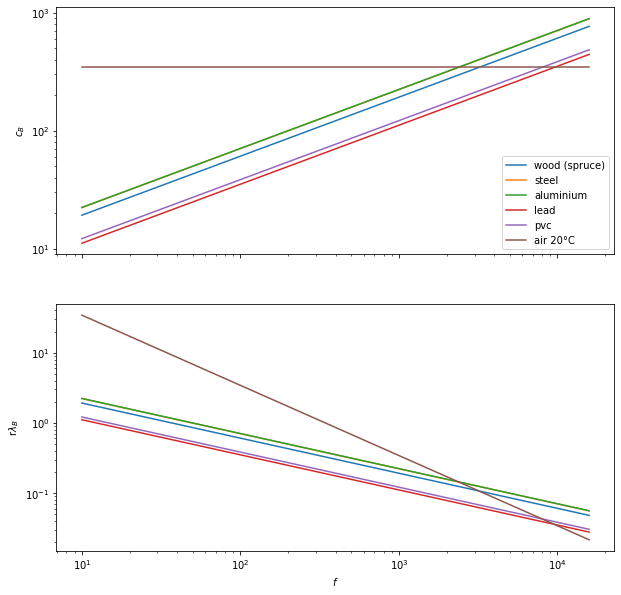

In [10]:
# freqcuency range from 10Hz to 12.5kHz
f = np.logspace(1,4.2,33)
# material selection: name, rho, E, mu
materials = (
    ('wood (spruce)',600,9e9,0.3),
    ('steel',7800,2.1e11,0.31),
    ('aluminium',2700,7.2e10,0.34),
    ('lead',11300,1.7e10,0.43),
    ('pvc',1350,3e9,0.4)
)
# thickness 5mm
h_ = 5e-3
fig,(ax1,ax2) = pl.subplots(2,1,figsize=(10,10),sharex=True)
# plot for all materials 
for name,rho_,E_,mu_ in materials:
    cB = np.sqrt(2*np.pi*f*h_)*(E_/(1-mu_**2)/12/rho_)**0.25
    ax1.loglog(f,cB,label=name)
    ax2.loglog(f,cB/f,label=name)
ax1.loglog((f[0],f[-1]),(343,343),label='air 20°C')
ax2.loglog((f[0],f[-1]),(343/f[0],343/f[-1]),label='air 20°C')
pl.xlabel('$f$')
ax1.set_ylabel('$c_B$')
ax2.set_ylabel('r$\lambda_B$')
ax1.legend();

_Where is the curve for steel?_

* frequency dependent phase speed results in different group speed
\begin{equation}
c_{Bg}=\frac{\partial \omega}{\partial k_B}= 2 k_B \sqrt{\frac{B'}{m''}}=2 c_B
\end{equation}
* energy transport with _twice_ the phase speed
* also frequency dependent
* illustrate with transport of a wave packet:
  * assume plane wave
  * FOURIER transform info $k$-space
\begin{equation}\label{eq:}
\xic(k,t)=\int_{-\infty}^{\infty}\xic(x,t)\e^{2\pi \jj k x}dx
\end{equation}
  * wave packet is sum of waves, each with certain $k_B$
  * find frequency of each wave:
  \begin{equation}
  \omega=k_B^2 \sqrt{\frac{B'}{m''}}
  \end{equation}
  * multiply with $\e^{\jj\omega}$ to apply phase shift
  * inverse FOURIER transform

In [11]:
cLIh = 5000*1e-3 # assume steel, thickness 1mm
cAir = 343 # speed of sound in air
n = 2048 # we use FFT with n samples
x_ = np.linspace(0,0.512,n) # distance 0.512 m
xi_ = np.exp(-1e5*(0.008-x_)**2)*np.sin(np.pi/0.008*x_) # wave 'packet'
xiF = np.fft.rfft(xi_) # FFT to get wave number spectrum
k_ = 2*np.pi*np.fft.rfftfreq(n,x_[1]) # wave numbers
om_ = k_**2 * 1.8 * cLIh/2/np.pi**2# circ. freq corr. to wave numbers steel plate
omAir = k_ *cAir# circ. freq. corresponding to air

def plot_wave_propagation(t=0):# time in milliseconds
    pl.figure(2,(10,4))
    xiF1 = xiF*np.exp((-1j)*omAir*t/1000) # phase shift
    xiFi1 = np.fft.irfft(xiF1) # inverse FFT
    # add some extra 'damping' to mitigate effect of periodic domain: 
    xiF2 = xiF*np.exp((-5e-2-1j)*om_*t/1000) # phase shift 
    xiFi2 = np.fft.irfft(xiF2) # inverse FFT
    pl.plot(x_,xiFi1.real,label='air') 
    pl.plot(x_,xiFi2.real,label='steel 1mm')
    pl.legend()
    pl.ylim(-0.3,0.3)
    pl.xlabel('x')
    pl.ylabel(r'$\xi$')
              
ipw.interact(plot_wave_propagation,t=(0,1.5,0.01));

interactive(children=(FloatSlider(value=0.0, description='t', max=1.5, step=0.01), Output()), _dom_classes=('w…

#### ----------------------------------------
* plate waves have in-plane and out-of-plane modes
* out-of-plane mode can be antisymmetric or symmetric
* thin plates: transversal, quasi-longitudinal and bending waves
* bending wave have propagating and evanescent components
* bending waves have frequency-dependent wave speeds
* next topic: structure-borne sound in beams

#### License

This notebook is an [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use it for your own purposes. The text and the images are licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), and any code under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Ennes Sarradj, Structure-borne sound lecture notes, 2019.

In [12]:
# this is just for custom formatting
from IPython.core.display import HTML
def css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()